In [1]:
import pandas as pd
df=pd.read_csv('/content/blogs.csv')

In [2]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Accuracy: 0.785
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.74      0.78      0.76        18
 comp.os.ms-windows.misc       0.75      0.95      0.84        22
comp.sys.ibm.pc.hardware       0.72      0.84      0.78        25
   comp.sys.mac.hardware       0.88      0.67      0.76        21
          comp.windows.x       1.00      0.24      0.39        25
            misc.forsale       0.78      0.78      0.78        18
               rec.autos       0.77      0.94      0.85        18
         rec.motorcycles       0.87      0.81      0.84        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.65      1.00      0.79        15
               sci.crypt       0.70      1.00      0.83        19
         sci.electronics       0.69      0.56      0.62        16
                 sci.med       0.83

<Axes: xlabel='Labels'>

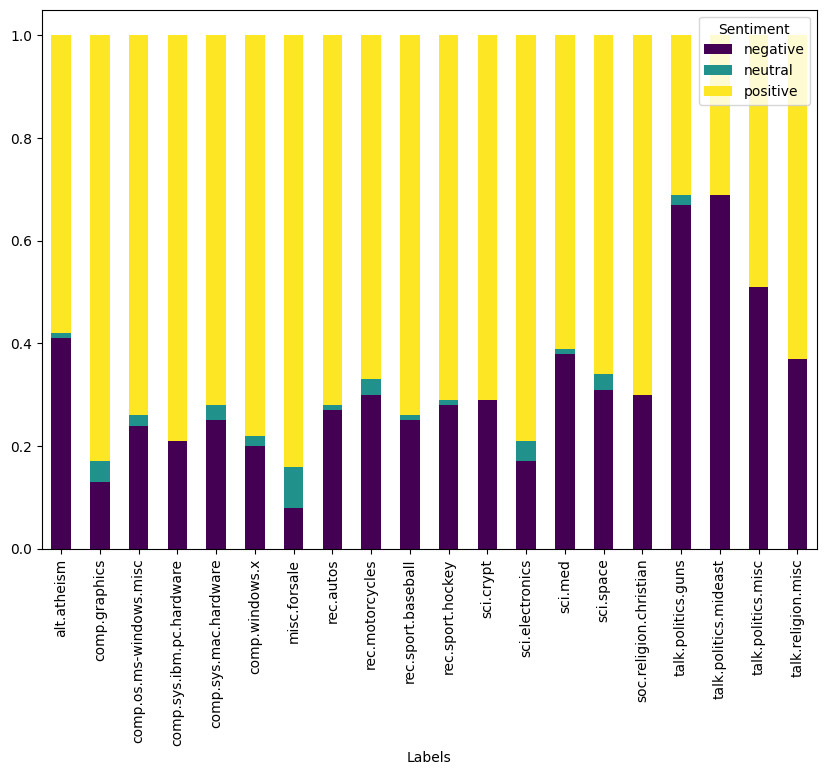

In [4]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

def clean_text(text):
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'Path:.*? ', '', text)
    text = re.sub(r'Newsgroups:.*? ', '', text)
    text = re.sub(r'Xref:.*? ', '', text)
    return text.lower()

df['Cleaned_Data'] = df['Data'].apply(clean_text)


vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)

sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')


downloaded and used vader for sentiment analasys

*   We remove unwanted metadata and characters to ensure the text data is clean and uniform. This is crucial for accurate feature extraction and model training.
*   Using TF-IDF helps in converting text data into numerical features that represent the importance of words in the documents



Using TextBlob helps in categorizing the sentiments, but more advanced models could be considered for better accuracy